# Persistent homology of activations

In this notebook we will show how the layers of a neural network trained on a classifiction task transforms the input data cloud.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn import datasets
from torchsummary import summary

import sys
sys.path.append("..")
from gdeep.neural_nets import sample_nn
from gdeep.neural_nets.utility import train_classification_nn, Layers_list, get_activations
from gdeep.neural_nets.persistence_activations import persistence_diagrams_of_activations, plot_persistence_diagrams
from gdeep.neural_nets.pca_activations import plot_PCA_activations

In [18]:
# Create labeled point cloud data

n_samples = 1000

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.3,
                                    noise=.05)


X = noisy_circles[0]
y = noisy_circles[1]

# Tranform to torch.tensor

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

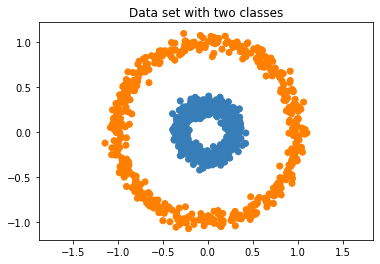

In [26]:
# Plot data set X, y

label_color = ['#377eb8' if lab else '#ff7f00' for lab in y.tolist()]

plt.scatter(X[:,0],X[:,1],
                color=label_color)

plt.title('Data set with two classes')
plt.axis('equal')
plt.show()

In [20]:
# Build NN
nodes_layer_1 = 32
dropout_p_layer_1 = 0.7
n_epochs = 5000
learning_rate = 0.01

nn_1 = sample_nn.SimpleNN(nodes_layer_1=nodes_layer_1, dropout_p=dropout_p_layer_1)


summary(nn_1, input_size=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]              96
           Dropout-2                   [-1, 32]               0
            Linear-3                    [-1, 2]              66
Total params: 162
Trainable params: 162
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [21]:
# Train NN

train_classification_nn(nn_1, X_tensor, y_tensor, n_epochs=2000)

99 0.6926097273826599
199 0.6681336164474487
299 0.6252800226211548
399 0.5244957208633423
499 0.3800162971019745
599 0.32335880398750305
699 0.23871202766895294
799 0.21202296018600464
899 0.2012067437171936
999 0.17750060558319092
1099 0.15884079039096832
1199 0.13442976772785187
1299 0.13391751050949097
1399 0.12884721159934998
1499 0.13001564145088196
1599 0.13355205953121185
1699 0.12129748612642288
1799 0.1257314383983612
1899 0.11090996116399765
1999 0.13027434051036835


## Visualize activations

In [22]:

# Persistence diagrams of layerwise activations for the training set

persistence_diagrams = persistence_diagrams_of_activations(nn_1, X_tensor, homology_dimensions=[0,1])

plot_persistence_diagrams(persistence_diagrams)


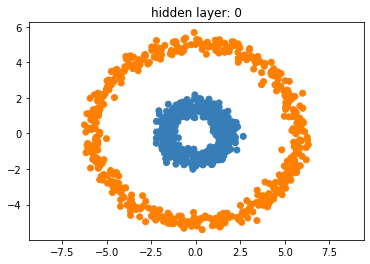

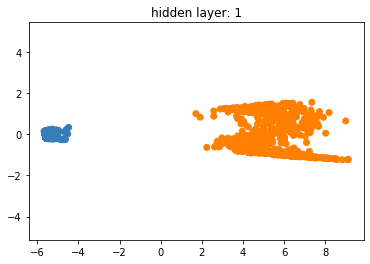

In [23]:
# Plot PCA of layerwise activations for the training set
from importlib import reload 

from gdeep.neural_nets.pca_activations import plot_PCA_activations

plot_PCA_activations(nn_1, X_tensor, ['#377eb8' if lab else '#ff7f00' for lab in y.tolist()], n_components=2)


# TODO: Fix color scheme

Because the activations of the last layers are points in $\mathbb R^2$, the dimension reduction was obsolete.

We can therefore look at the points directly together with the decision boundary $\{x=y\,|\, (x,y)\in \mathbb R^2\}$.

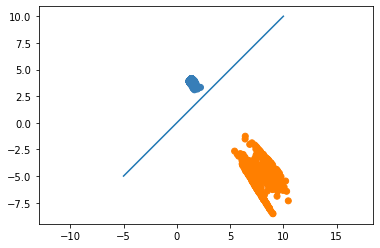

In [24]:
# Plot activations of last layer and decision boundary

activations_layers = get_activations(nn_1,X_tensor)
activation_l_2 = activations_layers.get_outputs()[1]

plt.scatter(activation_l_2[:,0], activation_l_2[:,1],c=label_color)
plt.plot([-5,10],[-5,10])

plt.axis('equal')
plt.show()